In [1]:
# Detect & Remove Outliers using IQR Method

# Objective: Learn to identify and remove outliers from a dataset using the Interquartile Range (IQR) method.
# Instructions:
# For each example, perform the following steps:
#     1. Load the Dataset: Load the dataset into your environment. You can use pandas to read the CSV file.
#     2. Calculate IQR: Calculate the first quartile (Q1), third quartile (Q3), and the IQR for the specified column.
#     3. Identify Outliers: Determine which data points are considered outliers.
#     4. Remove Outliers: Remove the outliers from the dataset.
#     5. Verify: Ensure the outliers are removed by checking the size or summary statistics of the dataset before and after the removal.
    
    
    

# Task:
#     Dataset: sales_data.csv(get it by your own it includes the column of Monthly_Sales)
#     Column to analyze: Monthly_Sales
#     Steps:
#         1. Load sales_data.csv .
#         2. Calculate Q1, Q3, and IQR for Monthly_Sales .
#         3. Identify outliers.
#         4. Remove the outliers.
#         5. Check the number of rows removed.







sales_data.csv not found - generating sample data
Sample data saved to sales_data.csv

Original Dataset Shape: (100, 2)
Initial Summary Statistics:
count       100.000000
mean      57435.272247
std       30119.705717
min       10703.823439
25%       41767.116114
50%       51159.314547
75%       62330.946595
max      146882.738998
Name: Monthly_Sales, dtype: float64

Number of Outliers Removed: 11
Cleaned Dataset Shape: (89, 2)

Final Summary Statistics:
count       89.000000
mean     48942.754038
std      13508.611636
min      20186.466281
25%      40990.419651
50%      48265.275764
75%      57699.011497
max      77784.172768
Name: Monthly_Sales, dtype: float64


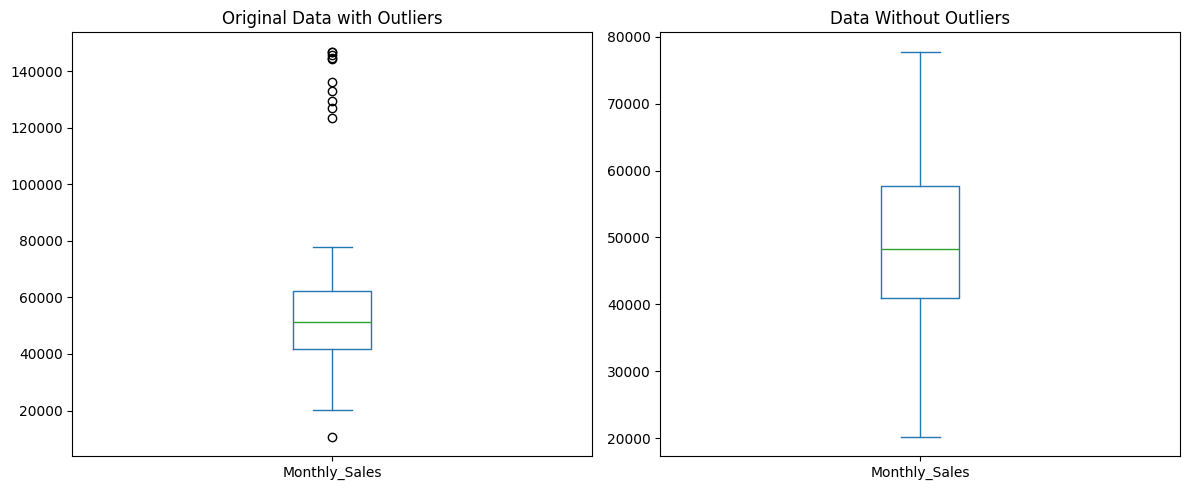


Cleaned data saved to clean_sales_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def generate_sample_data():
    np.random.seed(42)
    months = pd.date_range(start='2023-01-01', periods=100, freq='M').strftime('%Y-%m')
    base_sales = np.random.normal(50000, 15000, 90)  # 90 normal values
    outliers = np.random.uniform(120000, 150000, 10)  # 10 outlier values
    sales_data = np.concatenate([base_sales, outliers])
    np.random.shuffle(sales_data)
    return pd.DataFrame({
        'Month': months,
        'Monthly_Sales': sales_data
    })
try:
    sales = pd.read_csv('sales_data.csv')
    print("Loaded data from sales_data.csv")
except FileNotFoundError:
    print("sales_data.csv not found - generating sample data")
    sales = generate_sample_data()
    sales.to_csv('sales_data.csv', index=False)
    print("Sample data saved to sales_data.csv")

print("\nOriginal Dataset Shape:", sales.shape)
print("Initial Summary Statistics:")
print(sales['Monthly_Sales'].describe())

# Calculate IQR values
Q1 = sales['Monthly_Sales'].quantile(0.25)
Q3 = sales['Monthly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sales[(sales['Monthly_Sales'] < lower_bound) | (sales['Monthly_Sales'] > upper_bound)]

# Remove outliers
clean_sales = sales[(sales['Monthly_Sales'] >= lower_bound) & (sales['Monthly_Sales'] <= upper_bound)]

# Verify results
print("\nNumber of Outliers Removed:", len(sales) - len(clean_sales))
print("Cleaned Dataset Shape:", clean_sales.shape)
print("\nFinal Summary Statistics:")
print(clean_sales['Monthly_Sales'].describe())

# Visual comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sales['Monthly_Sales'].plot(kind='box')
plt.title('Original Data with Outliers')

plt.subplot(1, 2, 2)
clean_sales['Monthly_Sales'].plot(kind='box')
plt.title('Data Without Outliers')

plt.tight_layout()
plt.show()

# Save cleaned data
clean_sales.to_csv('clean_sales_data.csv', index=False)
print("\nCleaned data saved to clean_sales_data.csv")